# Cross Validation and Grid Search

Here are examples of cross validation (running the same model with different training sets to get statistics on the performance) and grid search (trying an exhaustive search in parameter space.)

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# Try this -- it may get blocked by LCPS?

# uncomment next line
mnist = fetch_openml('mnist_784', as_frame=False)

In [10]:
import pickle

In [16]:
outfile = open("mnist.pk", "wb")
pickle.dump(mnist, outfile)

In [ ]:
# if above doesn't work, do this.
# first download and gunzip the file from github "mnist.gz"

# infile = open("mnist.pk", "rb")
# mnist = pickle.load(infile)

In [3]:
X,y = mnist.data, mnist.target
X.shape, y.shape

((70000, 784), (70000,))

In [17]:
from sklearn.model_selection import train_test_split

Note we use a subset of the data!

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.01, train_size=0.1)

In [19]:
X_train.shape, X_test.shape

((7000, 784), (700, 784))

Let's make a binary classifier first : "5" or "not 5"

In [20]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

SGD (standard gradient descent) is a type of linear classifier that minimizes a loss function. We use it here just because it's different.

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [22]:
sgd_classifier = SGDClassifier(random_state = 42)
sgd_classifier.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [23]:
y_pred = sgd_classifier.predict(X_test)

/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [24]:
accuracy_score(y_pred, y_test_5)

0.9628571428571429

Now we try cross validation -- it runs the same model training with 5 different subsets of the training set. It validates it on the remainder. This is called k-fold validation. (you can change the 5)

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(sgd_classifier, X_train, y_train_5, cv=5, scoring="accuracy")

/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pewhi

array([0.945     , 0.95642857, 0.955     , 0.96      , 0.96214286])

As an example we do a KNN also

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train_5)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [29]:
cross_val_score(knn_classifier, X_train, y_train_5, cv=5, scoring="accuracy")

/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pewhi

array([0.98928571, 0.99      , 0.985     , 0.98785714, 0.98571429])

KNN can do multiclass, so let's throw the 10-class original training set at it.

In [30]:
cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring="accuracy")

/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pewhi

array([0.93571429, 0.925     , 0.93357143, 0.93214286, 0.92928571])

Let's look at some statistics. We'll run it 20 times and use a pandas dataset as a quick way to get stats.

In [31]:
knn_results = cross_val_score(knn_classifier, X_train, y_train, cv=20, scoring="accuracy")

/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pewhi

In [32]:
import pandas as pd

In [33]:
pd.Series(knn_results).describe()

count    20.000000
mean      0.936000
std       0.012347
min       0.914286
25%       0.925714
50%       0.937143
75%       0.944286
max       0.954286
dtype: float64

## Grid Search

A grid search takes a list of parameters and does a cross-validation on each parameter. It is a slow, exhaustive way to find the best setting for your model.

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Create pipeline
pipeline = make_pipeline(KNeighborsClassifier())

# Define parameter grid
param_grid = {
    'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=1)

# Print the grid_search to confirm no errors
print(grid_search)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=1,
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5,
                                                               10, 15, 20, 25,
                                                               30]},
             scoring='accuracy')


In [35]:
grid_search.fit(X_train, y_train)

/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pewhite/miniconda3/envs/ml_course/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pewhi

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'kneighborsclassifier__n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,1


We'll do lots of analysis on these results. The final best model is below.

In [213]:
knn_cv_results = pd.DataFrame(grid_search.cv_results_)

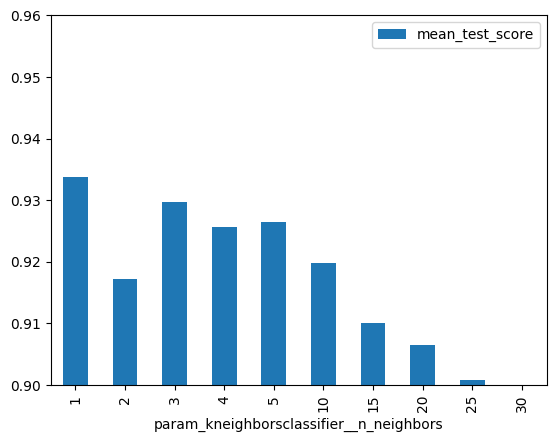

In [214]:
knn_cv_results.plot(x='param_kneighborsclassifier__n_neighbors', y='mean_test_score',
                   kind='bar',ylim=(0.9,0.96));

In [215]:
knn_cv_results.sort_values(by="mean_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008094,0.000404,0.331692,0.013044,1,{'kneighborsclassifier__n_neighbors': 1},0.928877,0.931847,0.940420,0.933715,0.004894,1
2,0.007854,0.000286,0.441001,0.090881,3,{'kneighborsclassifier__n_neighbors': 3},0.931877,0.923275,0.933991,0.929714,0.004634,2
4,0.007764,0.000423,0.346311,0.010852,5,{'kneighborsclassifier__n_neighbors': 5},0.931877,0.919417,0.927990,0.926428,0.005205,3
3,0.009060,0.001003,0.409770,0.098917,4,{'kneighborsclassifier__n_neighbors': 4},0.931020,0.917703,0.928418,0.925714,0.005763,4
5,0.007390,0.000223,0.327227,0.004433,10,{'kneighborsclassifier__n_neighbors': 10},0.923308,0.911273,0.924989,0.919857,0.006108,5
1,0.008793,0.001301,0.333124,0.016238,2,{'kneighborsclassifier__n_neighbors': 2},0.912596,0.915988,0.922846,0.917144,0.004263,6
6,0.007868,0.000141,0.379707,0.056234,15,{'kneighborsclassifier__n_neighbors': 15},0.917738,0.898843,0.913416,0.909999,0.008084,7
7,0.007594,0.000229,0.359337,0.039604,20,{'kneighborsclassifier__n_neighbors': 20},0.912596,0.899700,0.906987,0.906428,0.005280,8
8,0.007759,0.000049,0.327107,0.002920,25,{'kneighborsclassifier__n_neighbors': 25},0.908740,0.890699,0.903129,0.900856,0.007539,9
9,0.007628,0.000327,0.327724,0.004928,30,{'kneighborsclassifier__n_neighbors': 30},0.898029,0.883412,0.896700,0.892714,0.006600,10


In [216]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'kneighborsclassifier__n_neighbors': 1}


In [217]:
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

Best Model: Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])


In [218]:
# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy with Best Model:", accuracy)

Test accuracy with Best Model: 0.9328571428571428
